In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('benchmark_results.csv')

In [3]:
# Convert IsAllWildcards to a categorical variable for better visualization
data["IsAllWildcards"] = data["IsAllWildcards"].map({1: "All Wildcards", 0: "Mixed Directions"})

In [4]:
mean_data = data.groupby(["GridSize", "IsAllWildcards"]).mean().reset_index()

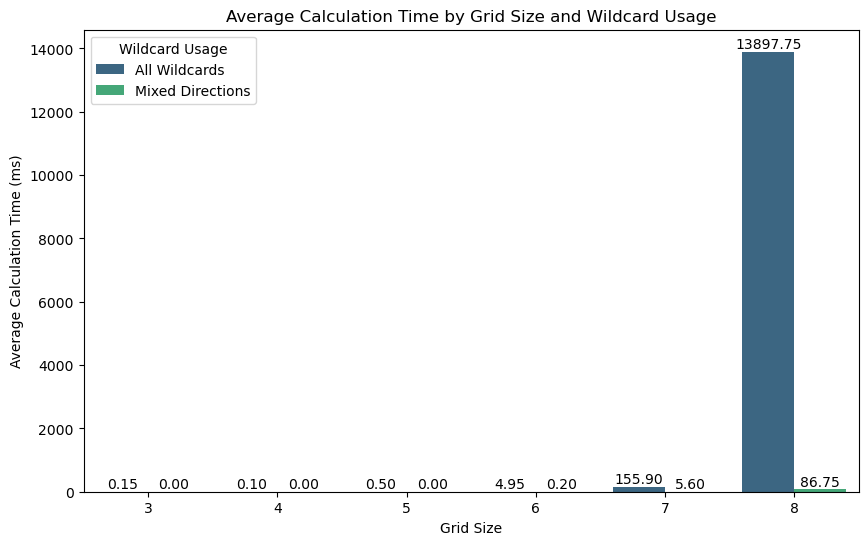

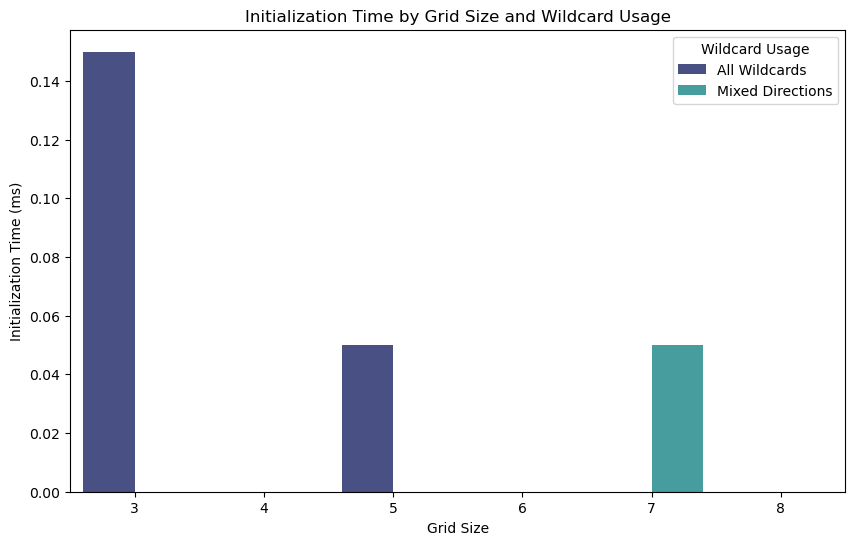

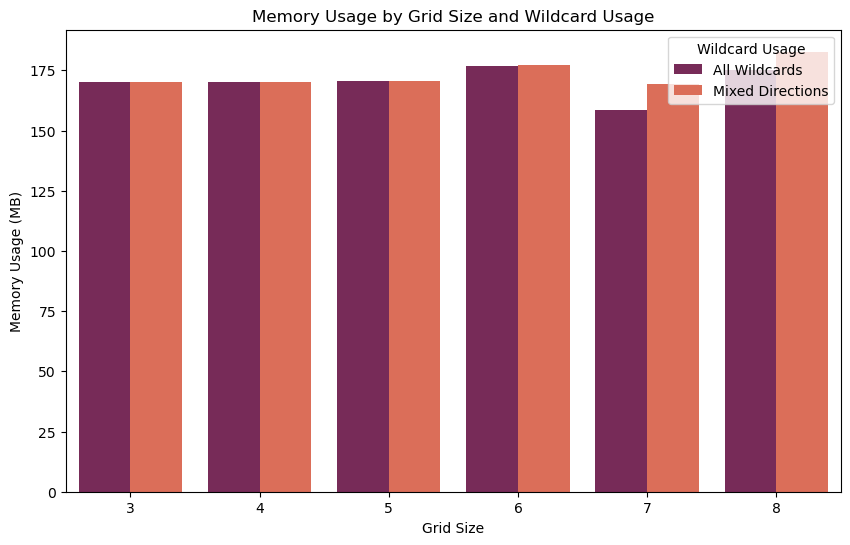

In [8]:
# Plot: Average Calculation Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=mean_data, x="GridSize", y="AverageCalculationTime", hue="IsAllWildcards", palette="viridis")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge")
    
plt.title("Average Calculation Time by Grid Size and Wildcard Usage")
plt.xlabel("Grid Size")
plt.ylabel("Average Calculation Time (ms)")
plt.legend(title="Wildcard Usage")
plt.show()

# Plot: Initialization Time
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_data, x="GridSize", y="InitializationTime", hue="IsAllWildcards", palette="mako")
plt.title("Initialization Time by Grid Size and Wildcard Usage")
plt.xlabel("Grid Size")
plt.ylabel("Initialization Time (ms)")
plt.legend(title="Wildcard Usage")
plt.show()

# Plot: Memory Usage
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_data, x="GridSize", y="MemoryUsage", hue="IsAllWildcards", palette="rocket")
plt.title("Memory Usage by Grid Size and Wildcard Usage")
plt.xlabel("Grid Size")
plt.ylabel("Memory Usage (MB)")
plt.legend(title="Wildcard Usage")
plt.show()